# Flights Data
## by Yomna Mahmoud

## Preliminary Wrangling

> The flights data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests

%matplotlib inline

> I will be loading the data by downloading it from the url and saving it to my directory 

In [ ]:
years=[1987, 1988, 2007, 2008]
years=['{}'.format(year) for year in years]
for year in years: 
    url='http://stat-computing.org/dataexpo/2009/'+year+'.csv.bz2'
    r=requests.get(url)
    with open(year+'.csv.bz2', 'wb',) as f:
        f.write(r.content)

In [3]:
selected_years=['1987.csv.bz2','1988.csv.bz2','2007.csv.bz2','2008.csv.bz2']        
flights = pd.concat([pd.read_csv(f,compression="bz2",header=0, sep=',', quotechar='"') for f in selected_years ])

In [4]:
flights.shape

(20976865, 29)

In [5]:
flights.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [6]:
flights.duplicated().sum()

116

In [7]:
flights.drop_duplicates(inplace=True)

> The columns Unique carrier is in code, Thus I will retrieve the code for each and add a new column to interpret the data easily

In [ ]:
url='http://stat-computing.org/dataexpo/2009/carriers.csv'
r=requests.get(url)
with open('carriers.csv', 'wb',) as f:
        f.write(r.content)

In [12]:
carriers=pd.read_csv('carriers.csv')
carriers.rename(index=str,columns={'Code':'UniqueCarrier','Description':'Airline'},inplace=True)
carriers.head()

,UniqueCarrier,Airline
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [13]:
flights=pd.merge(flights,carriers,on='UniqueCarrier')

In [14]:
flights.Airline.replace({'America West Airlines Inc. (Merged with US Airways 9/05. Stopped reporting 10/07.)':'America West Airlines Inc.','US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)':'US Airways Inc.'}, inplace = True)

In [15]:
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline
0,1987,10,14,3,741.0,730,912.0,849,PS,1451,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Pacific Southwest Airlines
1,1987,10,15,4,729.0,730,903.0,849,PS,1451,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Pacific Southwest Airlines
2,1987,10,17,6,741.0,730,918.0,849,PS,1451,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Pacific Southwest Airlines
3,1987,10,18,7,729.0,730,847.0,849,PS,1451,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Pacific Southwest Airlines
4,1987,10,19,1,749.0,730,922.0,849,PS,1451,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Pacific Southwest Airlines


### What is the structure of your dataset?

> This data set has 20976865 flights and 29 columns .Most of the data are integers and floats except for the destinations and the unique carriers
The 29 columns of flights data are described below 
* Year 1988-2008
* Month 1-12
* DayofMonth 1-31
* DayOfWeek 1 (Monday) - 7 (Sunday)
* DepTime actual departure time (local, hhmm)
* CRSDepTime scheduled departure time (local, hhmm)
* ArrTime actual arrival time (local, hhmm)
* CRSArrTime scheduled arrival time (local, hhmm)
* UniqueCarrier unique carrier code
* FlightNum flight number
* TailNum plane tail number
* ActualElapsedTime in minutes
* CRSElapsedTime in minutes
* AirTime in minutes
* ArrDelay arrival delay, in minutes
* DepDelay departure delay, in minutes
* Origin origin IATA airport code
* Dest destination IATA airport code
* Distance in miles
* TaxiIn taxi in time, in minutes
* TaxiOut taxi out time in minutes
* Cancelled was the flight cancelled?
* CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
* Diverted 1 = yes, 0 = no
* CarrierDelay in minutes
* WeatherDelay in minutes
* NASDelay in minutes
* SecurityDelay in minutes
* LateAircraftDelay in minutes

### What is/are the main feature(s) of interest in your dataset?

> The main features i'll be exploring mainly are delay times, cancellations and number of flights with the unique carrier

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Certain unique carriers will have delays more than other or more cancellations 

## Univariate Exploration

> 

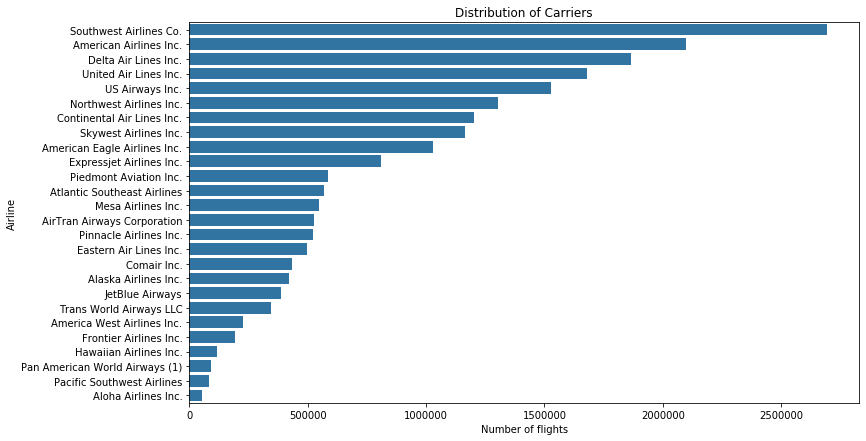

In [16]:
##plotting the unique carriers
plt.figure(figsize=[12,7])
base_color = sb.color_palette()[0]
index=flights.Airline.value_counts().index
sb.countplot(data=flights,y='Airline',color=base_color,order=index)
plt.title('Distribution of Carriers')
plt.xlabel('Number of flights');

> Southwest Airlines has the highest number of flights , Will check the delays

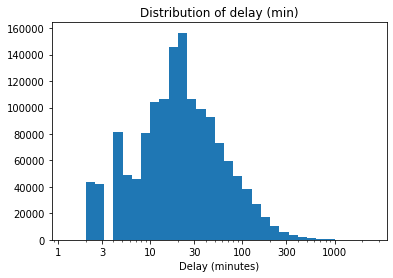

In [47]:
bins=10**np.arange(0.1,np.log10(flights.CarrierDelay.max()+0.1),0.1)
plt.hist(data = flights[flights.CarrierDelay > 0], x = 'CarrierDelay', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000], [1, 3, 10, 30, 100, 300, 1000])
plt.xlabel('Delay (minutes)')
plt.title('Distribution of delay (min)');

> The data axis was transformed to a log scale to better present the variations in delays, The mode of the delays is around 20 minutes

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes, The departure time required a log scale as the data distribution is variant

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes I had to exclude the zeros from the delay as they took a huge part of the data! As well as the unique carriers code had to be replaced from the carriers.csv to get the names of the carriers. I did this so the visualizations can be easily readable 

## Bivariate Exploration

> In this section i will be exploring the delay times and cancellations vs airline carrier

In [19]:
##getting avg of delay time per Airline
flights.dropna(subset=['CarrierDelay'],inplace=True) ##dropping nulls
delay_avg=flights.groupby('Airline')['CarrierDelay'].mean().sort_values(ascending=False)

In [20]:
flights.dropna(subset=['Cancelled'],inplace=True)
##getting number of percentage of cancelled flights per airline
total_flights=flights.Airline.value_counts()
cancelled_flights=flights.groupby('Airline')['Cancelled'].sum()
cancellation_rate=cancelled_flights/total_flights*100

In [21]:
##putting all the columns of avg delay & cancellation rate& total flights in on df
flights_summary=total_flights.to_frame()
flights_summary.rename(index=str,columns={'Airline':'total_flights'},inplace=True)
flights_summary['cancellation_rate'] = pd.Series(cancellation_rate, index=flights_summary.index)
flights_summary['delay_avg'] = pd.Series(delay_avg, index=flights_summary.index)
flights_summary

,total_flights,cancellation_rate,delay_avg
Southwest Airlines Co.,1388628,0.719631,3.142148
American Airlines Inc.,796881,2.249269,6.929776
Skywest Airlines Inc.,703127,2.017559,6.269796
American Eagle Airlines Inc.,654166,3.484131,5.675887
United Air Lines Inc.,606074,1.968242,5.871115
Delta Air Lines Inc.,574729,1.134622,5.117729
US Airways Inc.,568380,1.573243,5.544752
Expressjet Airlines Inc.,522656,2.066369,4.753344
Northwest Airlines Inc.,491744,1.589038,7.635172
Continental Air Lines Inc.,396198,0.744830,4.801619


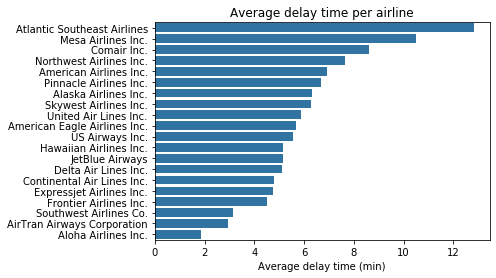

In [22]:
index=flights_summary['delay_avg'].sort_values(ascending=False).index
sb.barplot(data=flights_summary,y=flights_summary.index,x='delay_avg',color=base_color,order=index)
plt.title('Average delay time per airline')
plt.xlabel('Average delay time (min)');

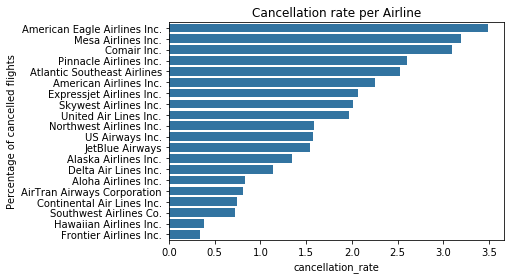

In [23]:
index=flights_summary['cancellation_rate'].sort_values(ascending=False).index
sb.barplot(data=flights_summary,y=flights_summary.index,x='cancellation_rate',color=base_color,order=index)
plt.title('Cancellation rate per Airline')
plt.ylabel('Percentage of cancelled flights');

> The highest  average delay is in Atlantic Southeast & the highest cancellation rate American Eagle 

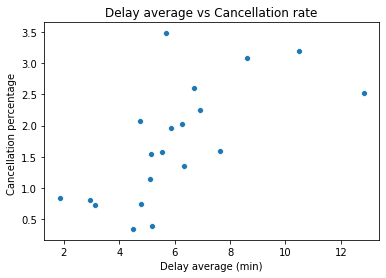

In [29]:
##plotting delay average against cancellation rate
sb.scatterplot(data=flights_summary,x='delay_avg',y='cancellation_rate')
plt.title('Delay average vs Cancellation rate')
plt.xlabel('Delay average (min)')
plt.ylabel('Cancellation percentage ');

In [30]:
##confirming the correlation between the cancellation and the delay avergae
flights_summary.corr()

,total_flights,cancellation_rate,delay_avg
total_flights,1.000000,0.129674,-0.078264
cancellation_rate,0.129674,1.000000,0.662913
delay_avg,-0.078264,0.662913,1.000000


> There is no clear strong relationship between the delay average and the cancellation rate for each airline

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The highest cancellation rate is 3.4 flights per 100 flights for American Eagle Airlines and the highest average delay time for  is 12-13 minutes for Atlantic Southeast. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes the engineerd features are the most interesting as they describe the nature of the delay per each airline better than the absolute total cancellations or delay for each airline

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

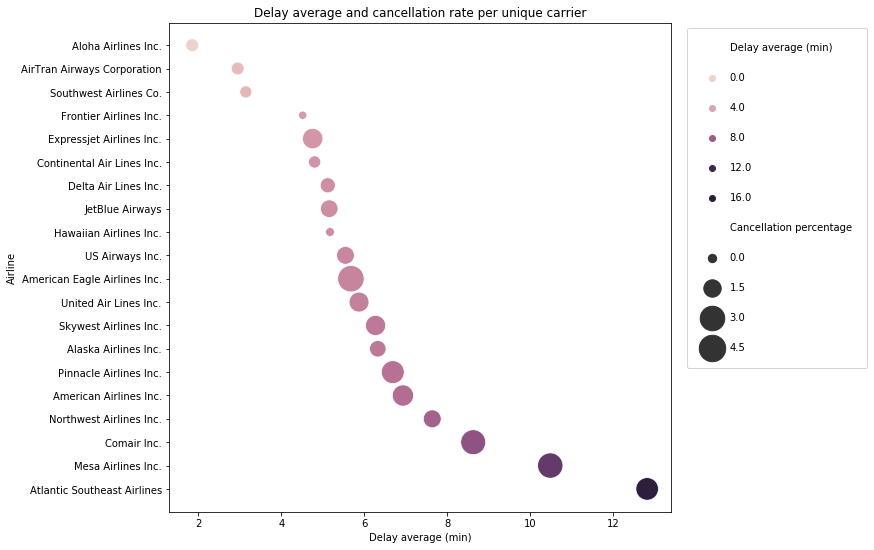

In [43]:
plt.figure(figsize=[9,9])
flights_summary=flights_summary.sort_values('delay_avg',ascending=False)
sb.scatterplot(data=flights_summary,y=flights_summary.index,x='delay_avg',size='cancellation_rate'
,sizes = (70, 700),hue='delay_avg')
plt.title('Delay average and cancellation rate per unique carrier')
plt.ylabel('Airline')
plt.xlabel('Delay average (min)')
##formatting the legend box and the legend names
L=plt.legend(bbox_to_anchor=(1.4, 1),labelspacing=2,borderpad=1.5)
L.get_texts()[0].set_text('Delay average (min)')
L.get_texts()[6].set_text('Cancellation percentage')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>I had to engineer two features which are the cancellation rate and the delay average to compare fairly between the airlines irrelevant of the airline making more flights or not to show true performance of airline 
Plotting the delay average and the cancellation rate against the airline showed the airlines performance and which is the best airline to fly onto 

### Were there any interesting or surprising interactions between features?

> It is interesting that there is no strong relationship between the average delay time and the cancellation rate. Although I expected that the more delay time the more cancellations there are